In [1]:
import pandas as pd
import helper_func as hf
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package punkt to /Users/user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load data
data = pd.read_csv('CNN_Articels_clean.csv')

In [3]:
#check data info
data.head()
#print column names from dataframe
print('Columns:', data.columns)
#print information like datatype
data.info()
#check if there are missing values
print("Null Values: ", data.isnull().sum())
len(data)

Columns: Index(['Index', 'Author', 'Date published', 'Category', 'Section', 'Url',
       'Headline', 'Description', 'Keywords', 'Second headline',
       'Article text'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Index            4076 non-null   int64 
 1   Author           4076 non-null   object
 2   Date published   4076 non-null   object
 3   Category         4076 non-null   object
 4   Section          4076 non-null   object
 5   Url              4076 non-null   object
 6   Headline         4076 non-null   object
 7   Description      4076 non-null   object
 8   Keywords         4076 non-null   object
 9   Second headline  4076 non-null   object
 10  Article text     4076 non-null   object
dtypes: int64(1), object(10)
memory usage: 350.4+ KB
Null Values:  Index              0
Author             0
Date 

4076

In [4]:
data

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...
...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",Australia's vaccine mandate is not to 'blackma...,(Reuters)The Australian Open's Covid-19 vacci...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",'Unanimous conclusion' that Peng Shuai is 'fin...,(CNN)Long-time International Olympic Committe...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",Zapping cow dung with lightning is helping to ...,A Norwegian technology company has found a way...


In [5]:
# add a column including the article texts to 
data['text'] = data['Article text']

In [6]:
# lower caption of the entires from the article texts in this dataset, to make it easier to find matches with the keyword
data['text'] = [x.lower() for x in data["text"]]

In [7]:
data

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","(cnn)right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...,(cnn)working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut...","(cnn)in a hong kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor...","new york (cnn business)for many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...,the european union formally approved on tuesda...
...,...,...,...,...,...,...,...,...,...,...,...,...
4071,4725,Story by Reuters,2021-12-01 10:01:29,sport,tennis,https://www.cnn.com/2021/12/01/tennis/australi...,Australian Open: Australia's vaccine mandate i...,The Australian Open's Covid-19 vaccine mandate...,"tennis, Australian Open: Australia's vaccine m...",Australia's vaccine mandate is not to 'blackma...,(Reuters)The Australian Open's Covid-19 vacci...,(reuters)the australian open's covid-19 vacci...
4072,4726,"Homero De la Fuente, CNN",2021-12-01 17:56:15,sport,golf,https://www.cnn.com/2021/12/01/golf/south-afri...,Four golfers test positive ahead of South Afri...,Four golfers scheduled to play in the South Af...,"golf, Four golfers test positive ahead of Sout...",Four golfers test positive ahead of South Afri...,(CNN)Four golfers scheduled to play in the So...,(cnn)four golfers scheduled to play in the so...
4073,4727,"Amy Woodyatt, CNN",2021-12-01 11:32:15,sport,tennis,https://www.cnn.com/2021/12/01/tennis/peng-shu...,Peng Shuai: 'Unanimous conclusion' that tennis...,Long-time International Olympic Committee (IOC...,"tennis, Peng Shuai: 'Unanimous conclusion' tha...",'Unanimous conclusion' that Peng Shuai is 'fin...,(CNN)Long-time International Olympic Committe...,(cnn)long-time international olympic committe...
4074,4728,Story by Reuters,2021-12-01 17:27:34,news,europe,https://www.cnn.com/2021/12/01/europe/cow-dung...,"This company is ""zapping"" cow dung with lightn...",A Norwegian technology company has found a way...,"europe, This company is ""zapping"" cow dung wit...",Zapping cow dung with lightning is helping to ...,A Norwegian technology company has found a way...,a norwegian technology company has found a way...


In [8]:
# chance data type of the columns, because they are not defined by default
data = hf.change_dtype_data(data=data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            4076 non-null   int64         
 1   Author           4076 non-null   string        
 2   Date published   4076 non-null   datetime64[ns]
 3   Category         4076 non-null   category      
 4   Section          4076 non-null   category      
 5   Url              4076 non-null   string        
 6   Headline         4076 non-null   string        
 7   Description      4076 non-null   string        
 8   Keywords         4076 non-null   string        
 9   Second headline  4076 non-null   string        
 10  Article text     4076 non-null   string        
 11  text             4076 non-null   object        
dtypes: category(2), datetime64[ns](1), int64(1), object(1), string(7)
memory usage: 328.1+ KB


In [9]:
# using get number of articles for specific keyword function from helper function
my_business_list = [
    "google",
    "microsoft",
    "amazon",
    "apple",
    "meta",
    "twitter",
    'bayer',
    'walmart',
    'shell',
    'siemens'
    ]     

numb_article_business = hf.get_numb_article_business(data, my_business_list)
numb_article_business

[[39, 'google'],
 [7, 'microsoft'],
 [30, 'amazon'],
 [49, 'apple'],
 [9, 'meta'],
 [671, 'twitter'],
 [4, 'bayer'],
 [13, 'walmart'],
 [25, 'shell'],
 [1, 'siemens']]

In [10]:
#extract all articles where keywords are mentioned

df_google = hf.filter_articles_by_keyword(data,"google") 

In [11]:
# list with human labelling
human_sentiment_google = ['positive', 'neutral', 'negative', 'positive', 'negative',  'positive', 'negative', 'positive', 'negative', 'neutral',  'neutral', 'neutral',
                          'neutral', 'positive', 'neutral', 'positive', 'neutral',  'neutral', 'positive', 'positive', 'negative', 'neutral', 'positive', 'positive', 'neutral',
                          'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'neutral', 'neutral', 'neutral', 'negative', 'negative', 'neutral', 'neutral', 'negative'   ]
len(human_sentiment_google)

39

In [12]:
# map human label to dataframe
label_map = {'positive': 1, 'negative': -1, 'neutral': 0}
df_google['human_label'] = human_sentiment_google
df_google['human_label'] = df_google['human_label'].map(label_map)
df_google.head()

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_5009/1291544576.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google['human_label'] = human_sentiment_google
/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_5009/1291544576.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_google['human_label'] = df_google['human_label'].map(label_map)


,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text,text,human_label
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d...","(cnn)right now, there's a shortage of truck d...",1
6,9,"Oliver Darcy, CNN Business",2022-03-14 19:12:28,business,media,https://www.cnn.com/2022/03/14/media/fox-corre...,Benjamin Hall: Fox News correspondent hospital...,"Fox News correspondent Benjamin Hall, who had ...","media, Benjamin Hall: Fox News correspondent h...",Fox News correspondent hospitalized after bein...,New York (CNN Business)Fox News correspondent ...,new york (cnn business)fox news correspondent ...,0
12,16,"Brian Fung, CNN Business",2022-03-12 15:11:14,business,tech,https://www.cnn.com/2022/03/12/tech/russia-int...,Russian internet users are learning to beat Pu...,A digital Iron Curtain may be descending on Ru...,"tech, Russian internet users are learning to b...",Russian internet users are learning how to bea...,(CNN Business)A digital Iron Curtain may be d...,(cnn business)a digital iron curtain may be d...,-1
15,19,CNN Business staff,2022-03-02 09:56:19,business,business,https://www.cnn.com/2022/03/02/business/compan...,Companies pulling back from Russia over the wa...,Dozens of the world's biggest companies have a...,"business, Companies pulling back from Russia o...",Here are the companies pulling back from Russia,(CNN Business)Dozens of the world's biggest c...,(cnn business)dozens of the world's biggest c...,1
16,20,"Rishi Iyengar, CNN Business",2022-03-11 18:41:00,business,tech,https://www.cnn.com/2022/03/11/tech/russia-int...,Why internet backbone services Cogent and Lume...,Big tech platforms have joined the global back...,"tech, Why internet backbone services Cogent an...",'This is different': Why internet backbone ser...,(CNN Business)Big tech platforms have joined ...,(cnn business)big tech platforms have joined ...,-1


In [13]:
# while human labelling, realized that a lot of entires from the small dataset includes the company name not in context, but rather mentioned shortly at the end. There entries were mainly labelled as neutral, making the dataset even smaller and less attractive to use.

## try different datasets
## financial sentiment analysis dataset 

In [14]:
# this dataset includes header of financial news and their sentiment label
financial_data = pd.read_csv('financialsentimentanalysis.csv')

In [15]:
#get information about the dataset
financial_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [16]:
# check for missing data
financial_data.isnull().sum()

Sentence     0
Sentiment    0
dtype: int64

In [17]:
# lower the capital of the header to make it easier to filter a company
financial_data['Sentence']=  [x.lower() for x in financial_data['Sentence']]
financial_data.head()

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,positive
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",negative
2,"for the last quarter of 2010 , componenta 's n...",positive
3,according to the finnish-russian chamber of co...,neutral
4,the swedish buyout firm has sold its remaining...,neutral


In [18]:
# check which sentiment labels are included in the dataset
financial_data['Sentiment'].unique()


array(['positive', 'negative', 'neutral'], dtype=object)

In [19]:
# map human label to dataframe
label_map = {'positive': 1, 'negative': -1, 'neutral': 0}
financial_data['Sentiment'] = financial_data['Sentiment'].map(label_map)
financial_data

,Sentence,Sentiment
0,the geosolutions technology will leverage bene...,1
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",-1
2,"for the last quarter of 2010 , componenta 's n...",1
3,according to the finnish-russian chamber of co...,0
4,the swedish buyout firm has sold its remaining...,0
...,...,...
5837,rising costs have forced packaging producer hu...,-1
5838,nordic walking was first used as a summer trai...,0
5839,"according shipping company viking line , the e...",0
5840,"in the building and home improvement trade , s...",0


In [62]:
# add a column named "text" consisting of the header to make it assessable for functions
financial_data['text'] = financial_data['Sentence']

In [21]:
financial_data

,Sentence,Sentiment,text
0,the geosolutions technology will leverage bene...,1,the geosolutions technology will leverage bene...
1,"$esi on lows, down $1.50 to $2.50 bk a real po...",-1,"$esi on lows, down $1.50 to $2.50 bk a real po..."
2,"for the last quarter of 2010 , componenta 's n...",1,"for the last quarter of 2010 , componenta 's n..."
3,according to the finnish-russian chamber of co...,0,according to the finnish-russian chamber of co...
4,the swedish buyout firm has sold its remaining...,0,the swedish buyout firm has sold its remaining...
...,...,...,...
5837,rising costs have forced packaging producer hu...,-1,rising costs have forced packaging producer hu...
5838,nordic walking was first used as a summer trai...,0,nordic walking was first used as a summer trai...
5839,"according shipping company viking line , the e...",0,"according shipping company viking line , the e..."
5840,"in the building and home improvement trade , s...",0,"in the building and home improvement trade , s..."


In [22]:
# filter datasets for company names, but all company datasubsets are way to small to continue.
fiancial_numb_article_business = hf.get_numb_article_business(financial_data, my_business_list)
fiancial_numb_article_business

[[7, 'google'],
 [12, 'microsoft'],
 [4, 'amazon'],
 [19, 'apple'],
 [0, 'meta'],
 [2, 'twitter'],
 [0, 'bayer'],
 [0, 'walmart'],
 [17, 'shell'],
 [20, 'siemens']]

## Try apple tweets sentiment dataset

In [23]:
# try new news article platform like twitter now x
apple_tweets = pd.read_csv('apple-twitter-sentiment-texts.csv')

In [24]:
# get information about dataset 
apple_tweets.info()
apple_tweets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1630 non-null   object
 1   sentiment  1630 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 25.6+ KB


,sentiment
count,1630.000000
mean,-0.333129
std,0.630760
min,-1.000000
25%,-1.000000
50%,0.000000
75%,0.000000
max,1.000000


In [25]:
apple_tweets.head()

,text,sentiment
0,Wow. Yall needa step it up @Apple RT @heynyla:...,-1
1,What Happened To Apple Inc? http://t.co/FJEX...,0
2,Thank u @apple I can now compile all of the pi...,1
3,The oddly uplifting story of the Apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [26]:
# lower capital letters for texts
apple_tweets['text']=  [x.lower() for x in apple_tweets['text']]
apple_tweets.head()

,text,sentiment
0,wow. yall needa step it up @apple rt @heynyla:...,-1
1,what happened to apple inc? http://t.co/fjex...,0
2,thank u @apple i can now compile all of the pi...,1
3,the oddly uplifting story of the apple co-foun...,0
4,@apple can i exchange my iphone for a differen...,0


In [27]:
apple_tweets['sentiment'].unique()

array([-1,  0,  1])


# function to classify sentiment so I can make the dataset labelled
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity >= 0.67:
        return 1 # stand for positive
    elif  0.33 <= polarity <= 0.66:
        return 0.5 # stand for neutral 
    else:
        return 0 # stand for negative sentimental
            
def add_sentiment_to_df(input_column):
    sentiment_labels= []
    for article in input_column:
        sentiment = classify_sentiment(article)
        sentiment_labels.append(sentiment)
    return sentiment_labels

                

## Use 3 methods for sentimental analysis to perform on unlabelled data
### - TextBlob
### - Vader
### - Transformer pipeline


## Textblob sentimental analysis


In [63]:
# list the data for sentiment analyisis
inputdata = [df_google, financial_data, apple_tweets]

In [64]:
#perform TextBlob on datasets and add the lebels to the dataframes
for i in inputdata:
    i['textblob'] = hf.add_textblob_sentiment_to_df(i['text'])

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_5009/3418488388.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['textblob'] = hf.add_textblob_sentiment_to_df(i['text'])


In [61]:
# to change default textblob sentimental values to values fitting to datasets, the results from textblob are mapped
#textblob_map = {1 : 1, 0 : -1, 0.5: 0}

#for i in inputdata:
    #i['textblob']= i['textblob'].map(textblob_map)

# Using the vader method

In [31]:
#perform Vader on datasets and add the label to the dataframes
for i in inputdata:
    i['vader']= hf.vader_df(i['text'])

/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_5009/2727660663.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['vader']= hf.vader_df(i['text'])


## Run supervised ML methods to perform sentimental analysis


## Tf-IDF with Logistic regression

In [33]:
# preprocess data for TF-IDF and logistic regression
for i in inputdata:
    i['text']= i['text'].apply(hf.preprocess_text)


/var/folders/pq/5_lw1tn96g5bj16hsbwk085c0000gn/T/ipykernel_5009/933062615.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  i['text']= i['text'].apply(hf.preprocess_text)


In [35]:
# split dataset df_google 
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_google['text'], df_google['human_label'], test_size=0.2, random_state=42)

In [36]:
# split dataset financial data
X_train2, X_test2, y_train2, y_test2 = train_test_split(financial_data['text'], financial_data['Sentiment'], test_size=0.2, random_state=42)

In [37]:
# split dataset apple_tweets
X_train3, X_test3, y_train3, y_test3 = train_test_split(apple_tweets['text'], apple_tweets['sentiment'], test_size=0.2, random_state=42)

In [39]:
# list datasubsets of all datasets used for sentiment analysis
xtraining_data = [X_train1, X_train2, X_train3]
xtest_data = [X_test1, X_test2, X_test3]
ytrain_data = [y_train1, y_train2, y_train3]
ytest_data = [y_test1, y_test2, y_test3]

In [40]:
# select vectorizer
tfidf= TfidfVectorizer()

In [41]:
# define a parameter grid for gridsearch for best settings
param_grid = {
    "vect__decode_error": ['strict', 'ignore', 'replace'],
    "vect__strip_accents": ['ascii','unicode', None],
    "vect__lowercase": [True, False],
    "vect__analyzer": ['word','char','char_wb'],
    "vect__stop_words":['english', None],
    "vect__max_df": [0.9, 1.0, 0.5],
    "vect__min_df": [1, 0.2, 0.1],
    "vect__max_features": [None, 4000],
                }

In [42]:
lr_tfidf = Pipeline([('vect', tfidf), 
                     ('clf', LogisticRegression(random_state=42))])


In [43]:
#run gridsearch
gs_lr_tfidf = GridSearchCV(lr_tfidf, param_grid,
                           scoring='accuracy',
                           cv=5,
                           verbose=1,
                           n_jobs=-1)

In [44]:
# train model
for X_train, y_train in zip(xtraining_data, ytrain_data):
    gs_lr_tfidf.fit(X_train,y_train)

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits


/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used since 'analyzer' != 'word'
  warnings.warn(
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/feature_extraction/text.py:543: UserWarning: The parameter 'stop_words' will not be used

In [45]:
#identify best paramaters
print('Best parameter set: ' + str(gs_lr_tfidf.best_params_))
print('Best accuracy: %.3f' % gs_lr_tfidf.best_score_)

Best parameter set: {'vect__analyzer': 'word', 'vect__decode_error': 'strict', 'vect__lowercase': True, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__min_df': 1, 'vect__stop_words': 'english', 'vect__strip_accents': 'ascii'}
Best accuracy: 0.798


In [46]:
# assign parameters
tfidf= gs_lr_tfidf.best_params_
tfidf

{'vect__analyzer': 'word',
 'vect__decode_error': 'strict',
 'vect__lowercase': True,
 'vect__max_df': 0.5,
 'vect__max_features': None,
 'vect__min_df': 1,
 'vect__stop_words': 'english',
 'vect__strip_accents': 'ascii'}

In [47]:
# run sentiment analysis with TF-IDF and Logistic regression 
vectorizer = TfidfVectorizer(
    analyzer='word',
    decode_error='strict',
    lowercase= True,
    max_df=0.5,
    max_features=None,
    min_df=1,
    stop_words= 'english',
    strip_accents= 'ascii'
    
)
results = hf.senti_log_ress_multiple_datasets(xtraining_data, xtest_data, ytrain_data, ytest_data, vectorizer)
models, vectorized_train_datasets, vectorized_test_datasets, vectorizers, evaluation_reports, test_datasets_with_predictions = results


/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [48]:
vocabs = vectorizer.get_feature_names_out()
print(vocabs[:5])
print("Vocabulary length:", len(vocabs))

['04' '05' '07' '08' '09']
Vocabulary length: 4336


In [49]:
metadata = vectorizer.get_params()
metadata

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 0.5,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': 'english',
 'strip_accents': 'ascii',
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [50]:
#extract pred labels from TF-IDF and LG from function
predicted_labels_tfidf_lg1 = test_datasets_with_predictions[0]['predicted_label']
predicted_labels_tfidf_lg2 = test_datasets_with_predictions[1]['predicted_label']
predicted_labels_tfidf_lg3 = test_datasets_with_predictions[2]['predicted_label']

In [51]:
df_google.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 3792
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Index            39 non-null     int64         
 1   Author           39 non-null     string        
 2   Date published   39 non-null     datetime64[ns]
 3   Category         39 non-null     category      
 4   Section          39 non-null     category      
 5   Url              39 non-null     string        
 6   Headline         39 non-null     string        
 7   Description      39 non-null     string        
 8   Keywords         39 non-null     string        
 9   Second headline  39 non-null     string        
 10  Article text     39 non-null     string        
 11  text             39 non-null     object        
 12  human_label      39 non-null     int64         
 13  textblob         39 non-null     int64         
 14  vader            39 non-null     int64         

In [55]:
# calculate confusion matrix of datasets for TF-IDF
confusion_matrix_tfidf_lg1 = evaluation_reports[0][2]
confusion_matrix_tfidf_lg2 = evaluation_reports[1][2]
confusion_matrix_tfidf_lg3 = evaluation_reports[2][2]


In [66]:
# calculate confusion matrix of datasets for Textblob
confusion_matrix_textblob1 = confusion_matrix(df_google['human_label'], df_google['textblob'])
confusion_matrix_textblob2 = confusion_matrix(financial_data['Sentiment'], financial_data['textblob'])
confusion_matrix_textblob3 = confusion_matrix(apple_tweets['sentiment'], apple_tweets['textblob'])


In [67]:
#calculate confusion matrix of datasets for vader
confusion_matrix_vader1 = confusion_matrix(df_google['human_label'], df_google['vader'])
confusion_matrix_vader2 = confusion_matrix(financial_data['Sentiment'], financial_data['vader'])
confusion_matrix_vader3 = confusion_matrix(apple_tweets['sentiment'], apple_tweets['vader'])

In [68]:
# assign the  confusion matrices to a list
conf_matrices= [confusion_matrix_tfidf_lg1,confusion_matrix_tfidf_lg2,confusion_matrix_tfidf_lg3,confusion_matrix_textblob1,confusion_matrix_textblob2,confusion_matrix_textblob3,confusion_matrix_vader1,confusion_matrix_vader2,confusion_matrix_vader3]
title_matrices=["confusion_matrix_tfidf_lg_google","confusion_matrix_tfidf_lg_financial","confusion_matrix_tfidf_lg_apple","confusion_matrix_textblob_google","confusion_matrix_textblob_financial","confusion_matrix_textblob_apple","confusion_matrix_vader_google","confusion_matrix_vader_financial","confusion_matrix_vader_apple"]

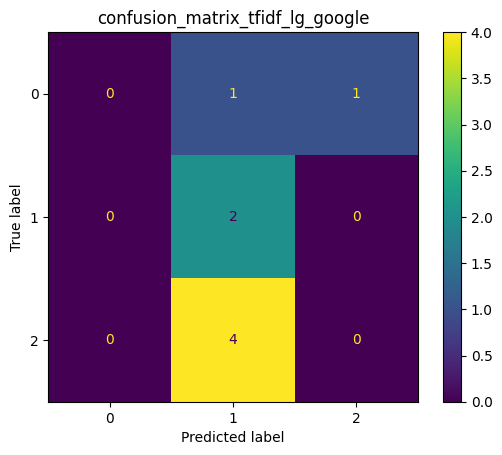

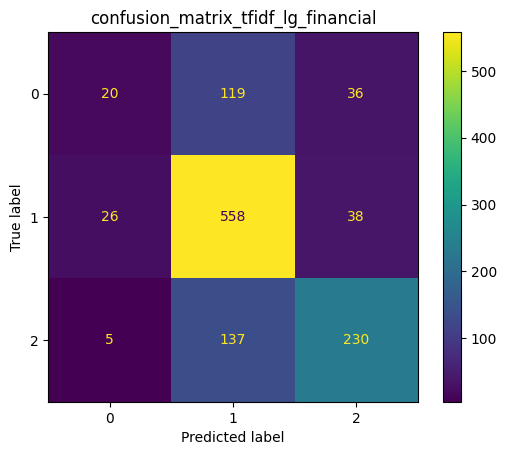

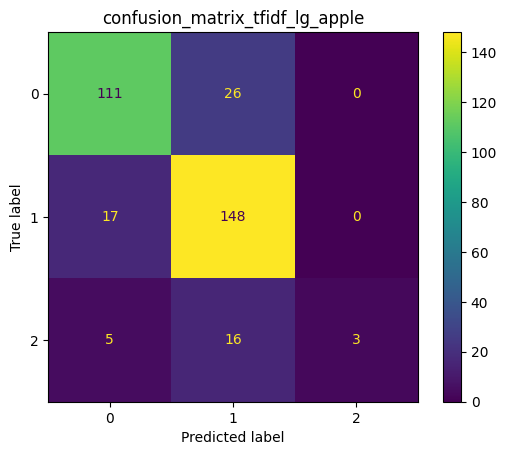

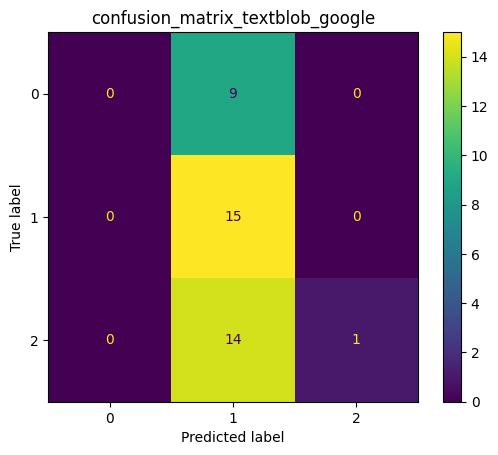

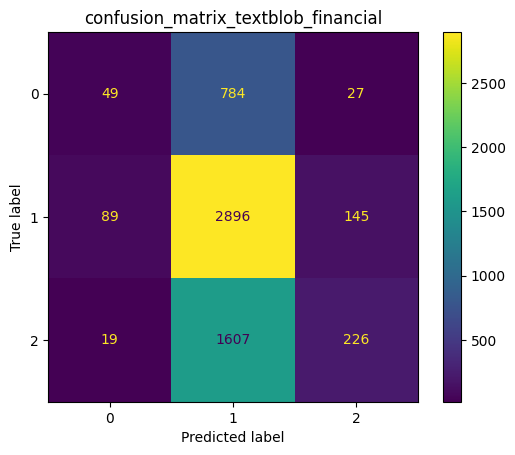

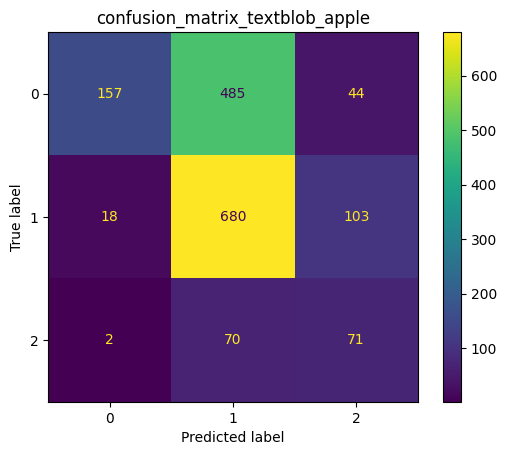

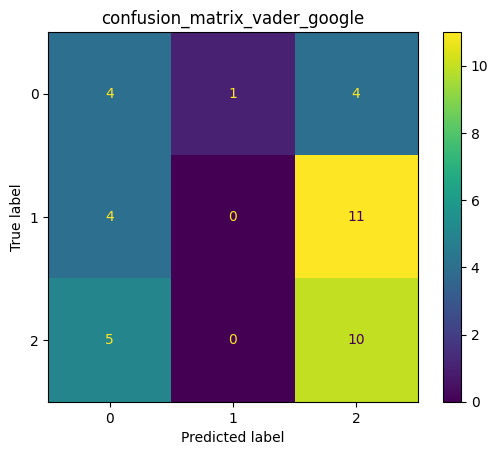

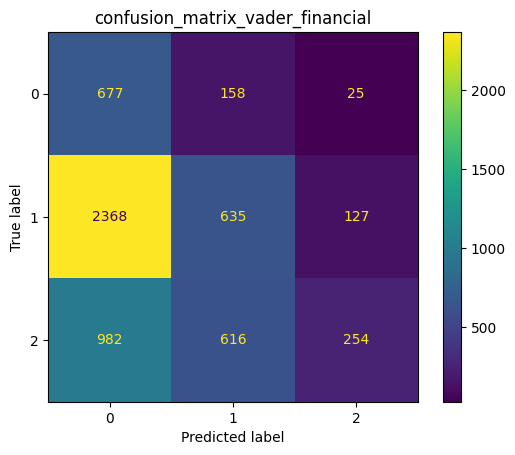

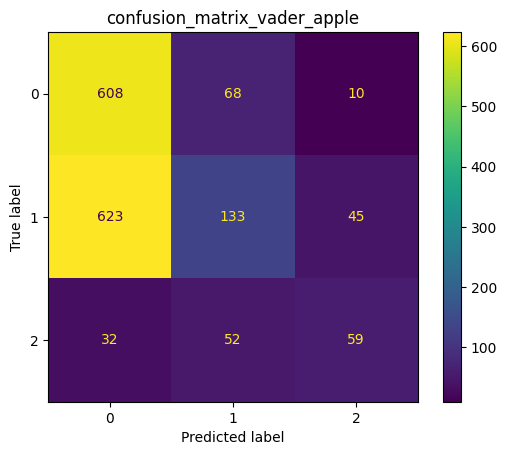

In [69]:
for cm, title in zip(conf_matrices, title_matrices):
    # Create the confusion matrix display
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    
    # Plot the confusion matrix
    disp.plot()
    
    # Set the title from the titles list
    plt.title(title)
    
    # Show the plot
    plt.show()


In [ ]:
# list of inputs needed for classification report for multiple datasets 
#[[y_true1,y_pred1], [y_true2,y_pred2], ...]
input_classification_report_google = [[y_test1, predicted_labels_tfidf_lg1],[df_google['human_label'], df_google['textblob']],[df_google['human_label'], df_google['vader']]]
input_classification_report_financial = [[y_test2, predicted_labels_tfidf_lg2],[financial_data['Sentiment'], financial_data['textblob']],[financial_data['Sentiment'], financial_data['vader']]]
input_classification_report_apple = [[y_test3, predicted_labels_tfidf_lg3],[apple_tweets['sentiment'], apple_tweets['textblob']],[apple_tweets['sentiment'], apple_tweets['vader']]]

In [ ]:
# calculate classificatio reports for google df for all models
model_performance_google = hf.calculate_classification_report(input_classification_report_google)
model_performance_google

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         2
           0       0.29      1.00      0.44         2
           1       0.00      0.00      0.00         4

    accuracy                           0.25         8
   macro avg       0.10      0.33      0.15         8
weighted avg       0.07      0.25      0.11         8

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         9
           0       0.38      1.00      0.56        15
           1       0.00      0.00      0.00        15

    accuracy                           0.38        39
   macro avg       0.13      0.33      0.19        39
weighted avg       0.15      0.38      0.21        39

              precision    recall  f1-score   support

          -1       0.31      0.44      0.36         9
           0       0.00      0.00      0.00        15
           1       0.40      0.67      0.50        15

    accuracy        

/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/user/IUBH/Wahlfach/WahlAI/aiENV/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [ ]:
#calculate classification report for financial dataset for all models 
model_performance_financial = hf.calculate_classification_report(input_classification_report_financial)
model_performance_financial

              precision    recall  f1-score   support

          -1       0.39      0.11      0.18       175
           0       0.69      0.90      0.78       622
           1       0.76      0.62      0.68       372

    accuracy                           0.69      1169
   macro avg       0.61      0.54      0.54      1169
weighted avg       0.66      0.69      0.66      1169

              precision    recall  f1-score   support

          -1       0.31      0.06      0.10       860
           0       0.55      0.93      0.69      3130
           1       0.57      0.12      0.20      1852

    accuracy                           0.54      5842
   macro avg       0.48      0.37      0.33      5842
weighted avg       0.52      0.54      0.45      5842

              precision    recall  f1-score   support

          -1       0.17      0.79      0.28       860
           0       0.45      0.20      0.28      3130
           1       0.63      0.14      0.22      1852

    accuracy        

In [ ]:
#calculate classification report for the apple tweet dataset for all models
model_performance_apple = hf.calculate_classification_report(input_classification_report_apple)
model_performance_apple

              precision    recall  f1-score   support

          -1       0.83      0.81      0.82       137
           0       0.78      0.90      0.83       165
           1       1.00      0.12      0.22        24

    accuracy                           0.80       326
   macro avg       0.87      0.61      0.63       326
weighted avg       0.82      0.80      0.78       326

              precision    recall  f1-score   support

          -1       0.91      0.22      0.36       686
           0       0.54      0.82      0.65       801
           1       0.28      0.50      0.36       143

    accuracy                           0.54      1630
   macro avg       0.58      0.52      0.46      1630
weighted avg       0.67      0.54      0.50      1630

              precision    recall  f1-score   support

          -1       0.48      0.89      0.62       686
           0       0.53      0.17      0.25       801
           1       0.52      0.41      0.46       143

    accuracy        

In [ ]:
# show sentiment distribution of y true for google data
df_google['human_label'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sentiment distibution google df')
plt.show()


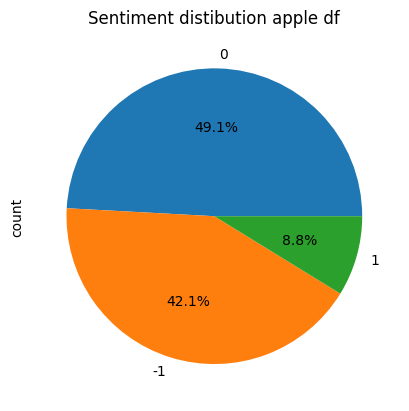

In [70]:
# show sentiment distribution of y true for apple tweets
apple_tweets['sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sentiment distibution apple df')
plt.show()

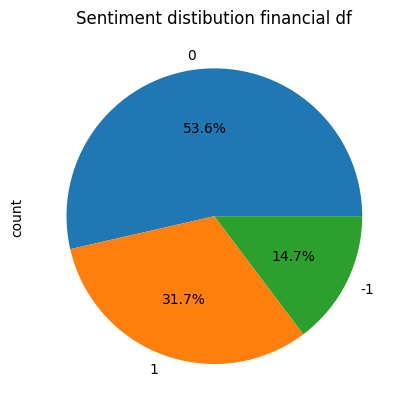

In [71]:
# show sentiment distribution of y true for financial data
financial_data['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Sentiment distibution financial df')
plt.show()